# Lab 13

## Support Vector Machine

In [37]:
# Let's get the dataset from sklearn repo
from sklearn.datasets import load_iris

In [38]:
dataset = load_iris(as_frame=True)

In [39]:
dataset.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 150 (50 in each of three classes)\n:Number of Attributes: 4 numeric, predictive attributes and the class\n:Attribute Information:\n    - sepal length in cm\n    - sepal width in cm\n    - petal length in cm\n    - petal width in cm\n    - class:\n            - Iris-Setosa\n            - Iris-Versicolour\n            - Iris-Virginica\n\n:Summary Statistics:\n\n============== ==== ==== ======= ===== ====================\n                Min  Max   Mean    SD   Class Correlation\n============== ==== ==== ======= ===== ====================\nsepal length:   4.3  7.9   5.84   0.83    0.7826\nsepal width:    2.0  4.4   3.05   0.43   -0.4194\npetal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\npetal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n============== ==== ==== ======= ===== ====================\n\n:Missing Attribute Values: None\n:Class Distribution: 

In [40]:
type(dataset)

sklearn.utils._bunch.Bunch

In [41]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [42]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [43]:
dataset.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [44]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [45]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [46]:
dataset.data.shape

(150, 4)

In [47]:
dataset.data.shape

(150, 4)

In [48]:
dataset.target.shape

(150,)

In [49]:
dataset.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [50]:
dataset.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

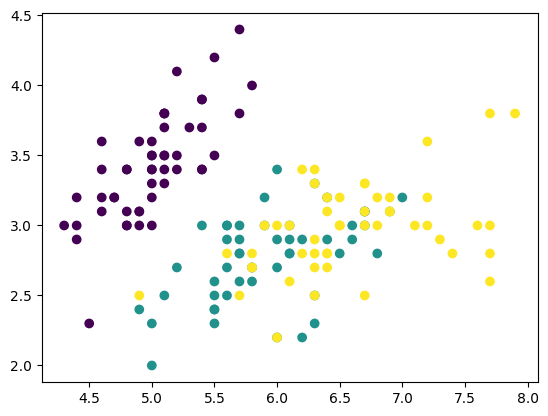

In [51]:
import matplotlib.pyplot as plt
plt.scatter(dataset.data['sepal length (cm)'], dataset.data['sepal width (cm)'], c=dataset.target)

Text(0.5, 1.0, 'Petal Length Vs Width')

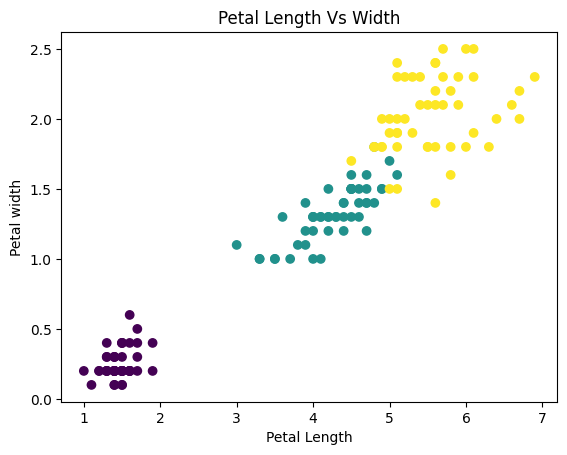

In [52]:
plt.scatter(dataset.data['petal length (cm)'], dataset.data['petal width (cm)'], c=dataset.target,)
plt.xlabel("Petal Length")
plt.ylabel("Petal width")
plt.title("Petal Length Vs Width")

In [53]:
# Lets classification using support vector machine

In [54]:
# Lets take data of setosa and versicolor
# we know that for setosa the target value is 0 and for versicolor it is 1
selection = ((dataset.target==0) | (dataset.target==1))

In [55]:
type(selection)

pandas.core.series.Series

In [56]:
selection.value_counts()

target
True     100
False     50
Name: count, dtype: int64

In [57]:
X_setosa_versicolor=dataset.data[selection].values

In [58]:
X_setosa_versicolor.shape

(100, 4)

In [59]:
y_setosa_versicolor = dataset.target[(dataset.target==0) | (dataset.target==1)]

In [60]:
y_setosa_versicolor.shape

(100,)

In [61]:
# lets take the classifier support vector machine , svm
from sklearn.svm import SVC

In [62]:
# take the dataset with two features only
X = dataset.data[["petal length (cm)", "petal width (cm)"]].values
y = dataset.target

In [63]:
setosa_or_versicolor = (y==0) | (y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [64]:
X.shape, y.shape

((100, 2), (100,))

In [65]:
svm_clf = SVC(kernel="linear", C = 1e10)

In [66]:
svm_clf.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
accuracy_score(y, svm_clf.predict(X))

1.0

In [69]:
# Plot

In [70]:
import numpy as np
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    # at the decision boundary, w0 * x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 -b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_
    plt.title('margin = {}'.format(np.abs(margin)))
    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA', zorder=-1)

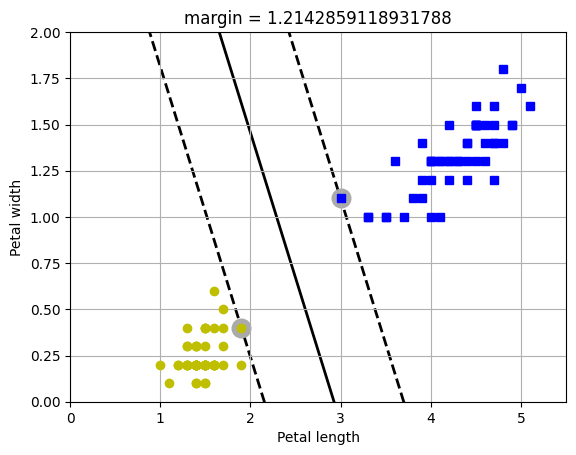

In [71]:
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([0, 5.5, 0, 2])
plt.grid()

In [72]:
svm_clf.coef_, svm_clf.intercept_, svm_clf.support_vectors_

(array([[1.29411744, 0.82352928]]),
 array([-3.78823471]),
 array([[1.9, 0.4],
        [3. , 1.1]]))